# Validation of a classification problem

## Using diabetes dataset (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 8 Features:
- **Pregnancies**
Number of times pregnant
- **Glucose**
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**
Diastolic blood pressure (mm Hg)
- **SkinThickness**
Triceps skin fold thickness (mm)
- **Insulin**
2-Hour serum insulin (mu U/ml)
- **BMI**
Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**
Diabetes pedigree function
- **Age**
Age (years)
- **Outcome**
Class variable (0 or 1)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score

In [29]:
Data = pd.read_csv('DiabetesDataset.csv', header = None)
X = Data.iloc[:,:-1].copy()
Y = Data.iloc[:,-1].copy()
display(X)
display(Y)

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [30]:
X.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


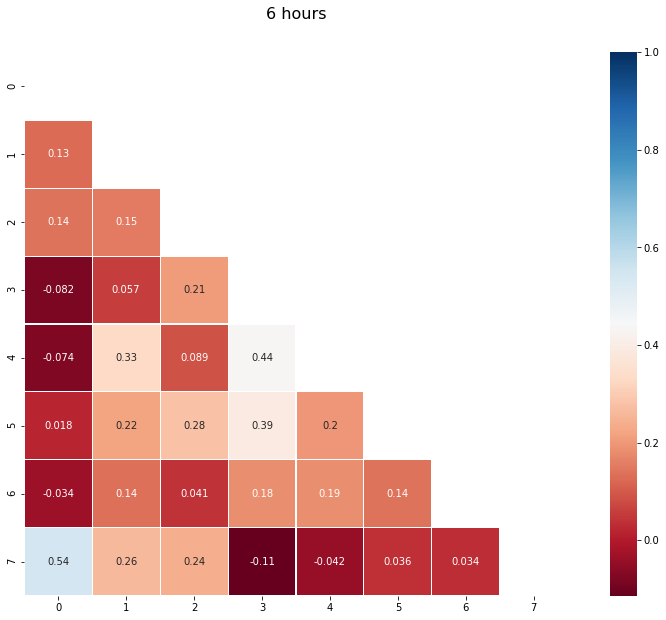

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'6 hours', y=1.05, size=16)

mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(X.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

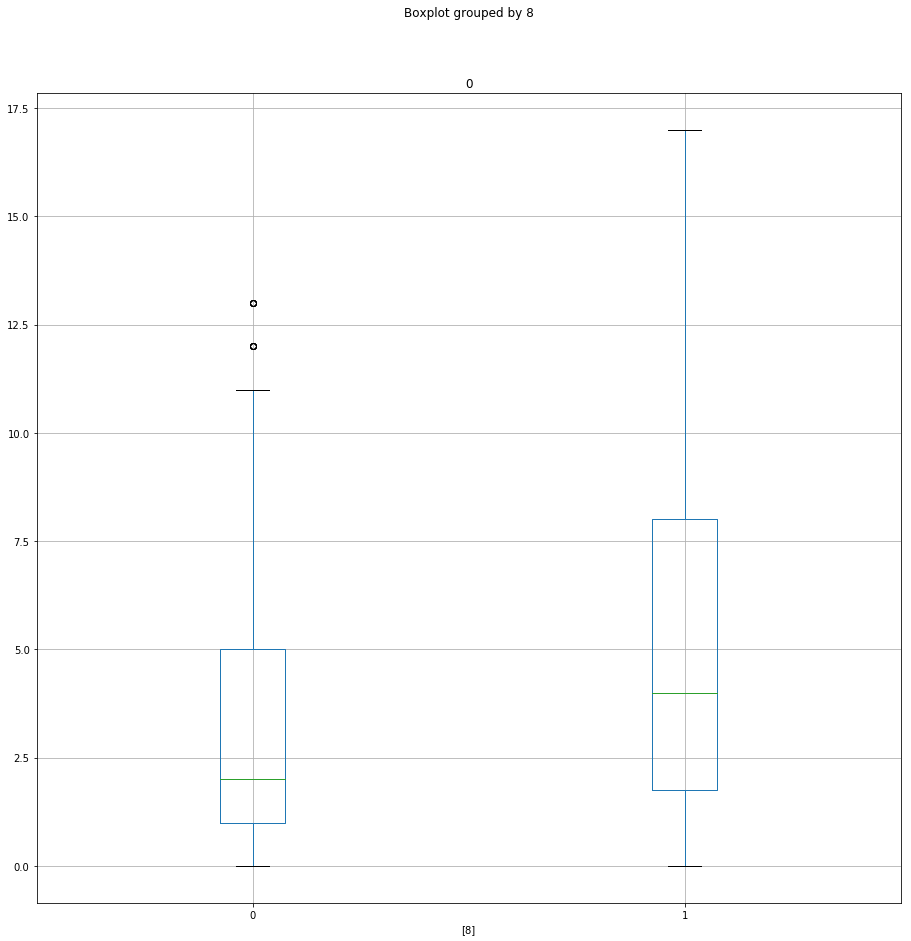

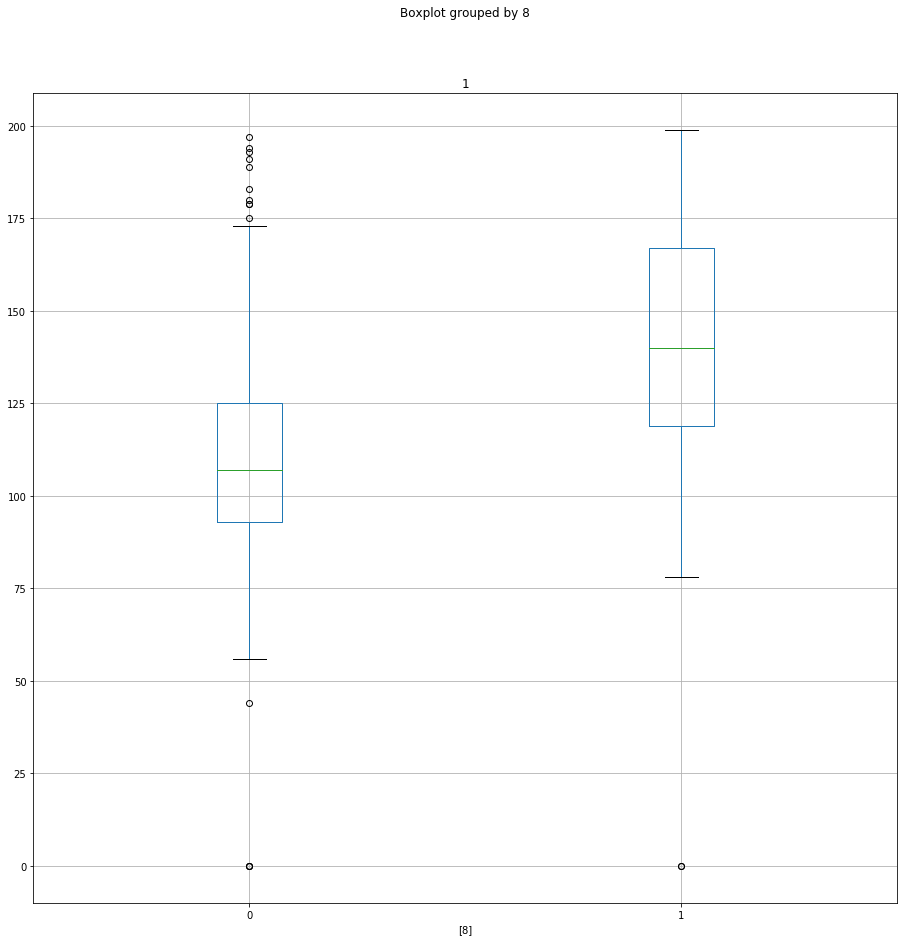

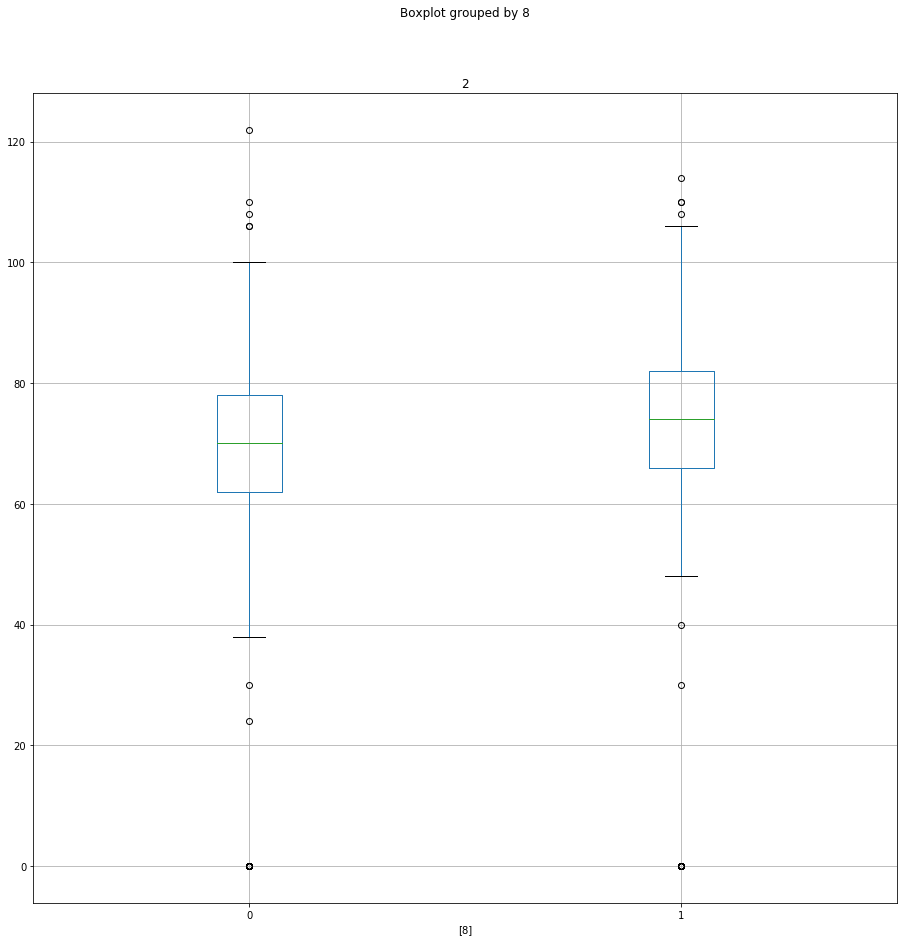

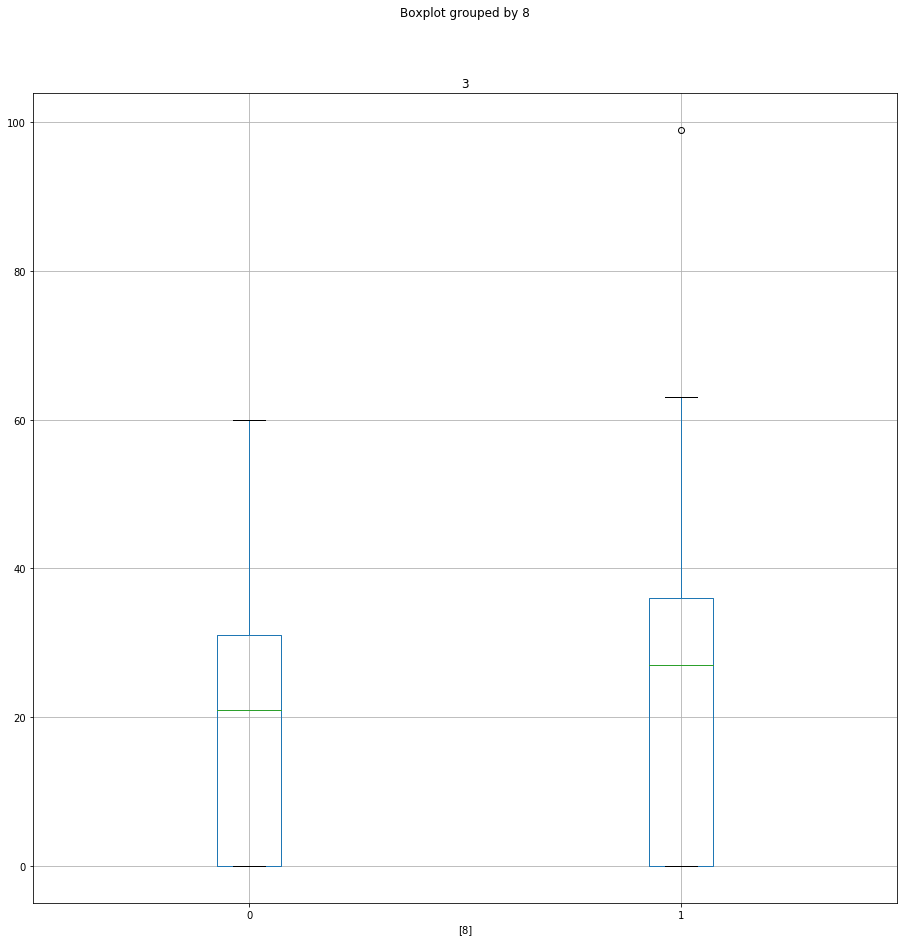

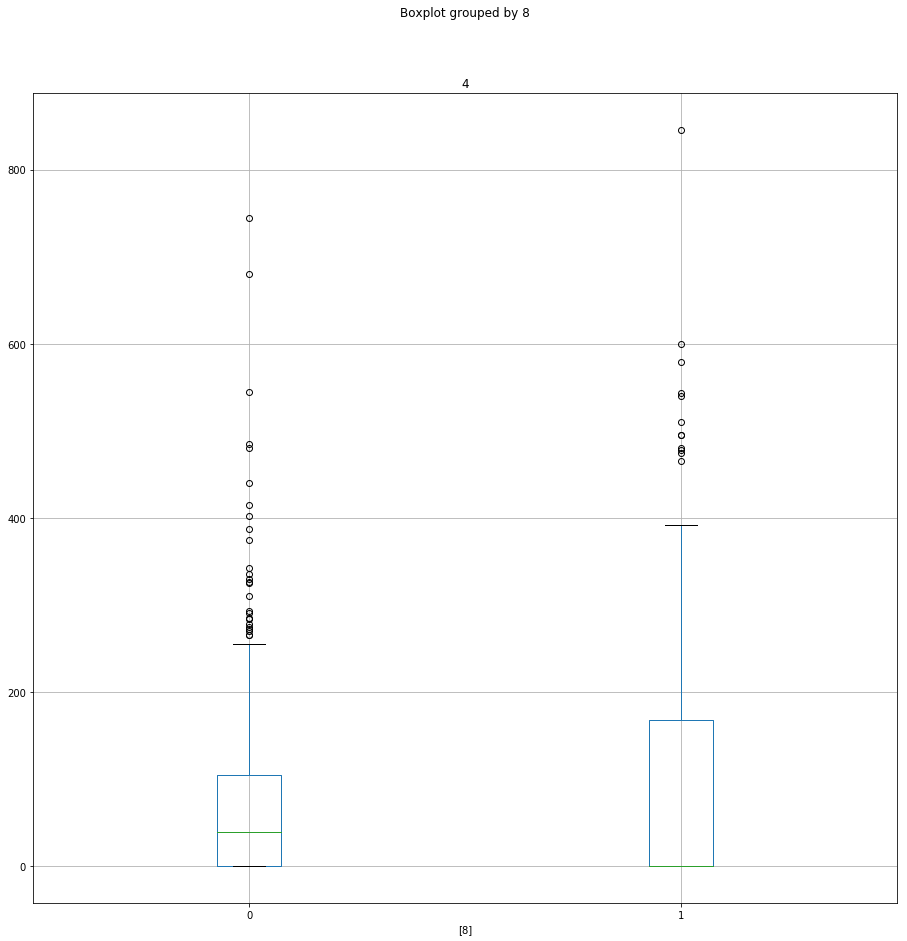

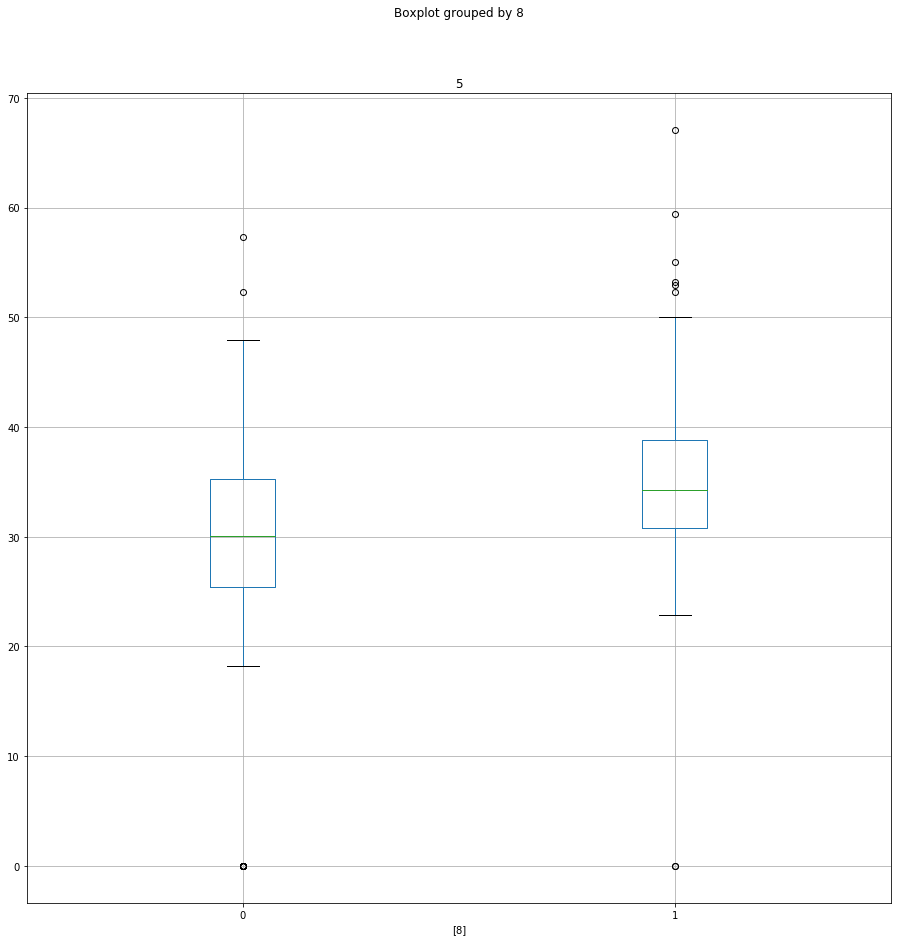

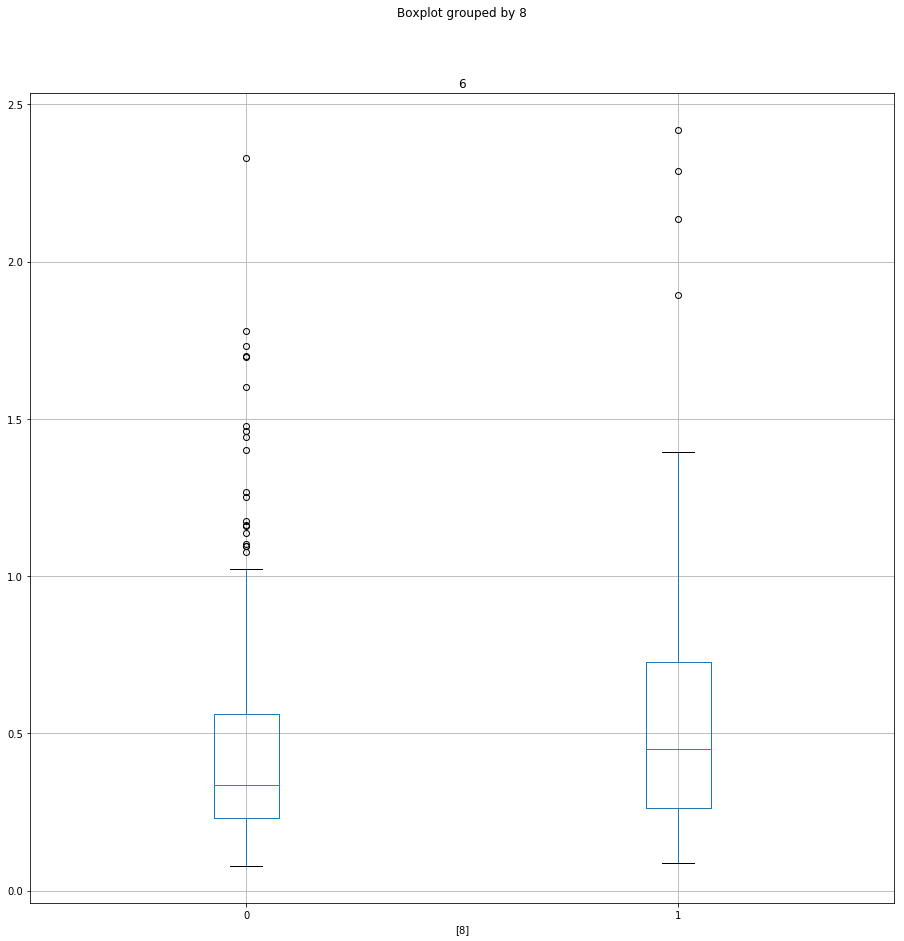

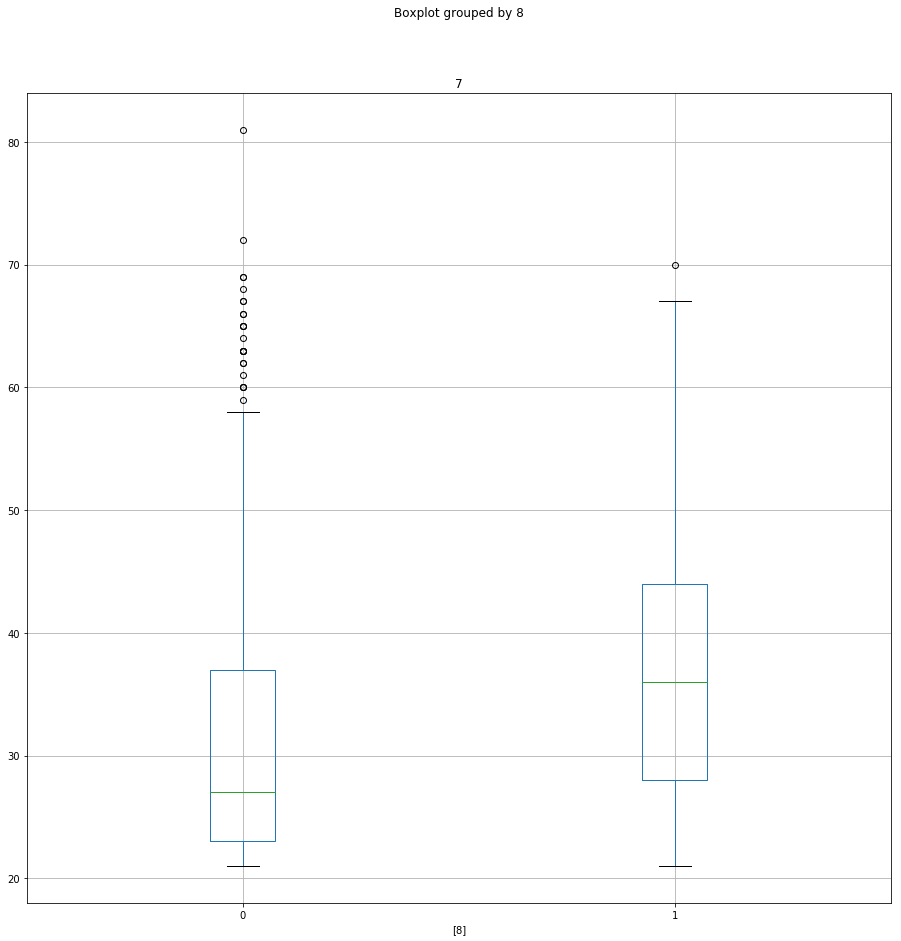

In [32]:
for i in range(8):
    Data.iloc[:,[i,8]].boxplot(by=8, figsize=(15,15))

# Crossvalidation

## SkLearn has a function to create the folds called KFold. However this funtion only picks from the the dataset data randonmly regardless the number of elements of each class or the label. So, you can finish with a fold with just one class.

## That's why we have created our own KFold function, that asigns samples to the folds based on the labels. Starts with the class 0, asigning equal quantity of samples of that class in all the folds, then class 1, then class 2, ...

In [33]:
def Kfold(y, nfolds = 10):
    uniquetags = np.unique(y)
    indices = [np.empty(0,)] * nfolds
    globaladd = 0
    for j in range(len(uniquetags)):
        inds = np.where(uniquetags[j]==y)[0]
        count = np.sum(uniquetags[j]==y)
        value_per_fold = int(count/nfolds)

        indrandom = np.random.permutation(count)
        inds = inds[indrandom]

        for i in range(nfolds):
            indices[i] = np.concatenate((indices[i], inds[i*value_per_fold:(i+1)*value_per_fold]), axis=0)
        
        lack = count - value_per_fold*nfolds

        indlack = value_per_fold*nfolds
        for i in range(lack):
            indices[globaladd] = np.append(indices[globaladd], inds[indlack+i])
            globaladd = globaladd + 1

            if globaladd == nfolds:
                globaladd = 0

    output = []  
    for i in range(nfolds):
        output.append([ np.concatenate((np.array(indices)[np.where(np.arange(nfolds) != i)[0]])).astype(int) ,indices[i].astype(int)])

    return output

In [34]:
for train_index, test_index in Kfold(np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1]),10):
    print("---------------------------------------------------------------------------") 
    print("---------------------------------------------------------------------------") 
    print("TRAIN: folds", train_index) 
    print("---------------------------------------------------------------------------") 
    print("TEST: Test fold", test_index)
    print("---------------------------------------------------------------------------") 
    print("---------------------------------------------------------------------------") 

---------------------------------------------------------------------------
---------------------------------------------------------------------------
TRAIN: folds [4 7 6 2 3 5 0 8 9]
---------------------------------------------------------------------------
TEST: Test fold [1]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
TRAIN: folds [1 7 6 2 3 5 0 8 9]
---------------------------------------------------------------------------
TEST: Test fold [4]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
----------------------------------------------------------

## KNN Algorithm

In [35]:
def KnnRegression(Xdatabase, Ydatabase, k, XtoPredict):  
    M = XtoPredict.shape[0]
    
    NClasses = len(np.unique(Ydatabase))
    Yout = np.zeros(shape=(XtoPredict.shape[0], NClasses))
    
    for i in range(0,M):
        distance = np.linalg.norm(XtoPredict[i]-Xdatabase,axis=1)
        indices = np.argsort(distance)[:k]
        Yout[i, :]  = np.histogram(Ydatabase[indices], bins=range(NClasses + 1))[0] / k
    
    return Yout

In [36]:
Xnp = X.values
Ynp = Y.values
KnnRegression(Xnp, Ynp, 10, Xnp)

array([[0.5, 0.5],
       [0.9, 0.1],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.3, 0.7],
       [1. , 0. ]])

## Let's separate first the training set and validation set from the testing

In [37]:
count = Xnp.shape[0]
ind = np.random.permutation(count)
print('Size: ',count)
print('Random indices: ', ind)

Size:  768
Random indices:  [716  53 321 491 747 196 519 705 387 644 467 535 516 528 347 359 474 338
  92 485 386 612 626  22 162 724  35 248 498 195 424 477  25  96 311 354
 501 137  85 634  88 625  73 697 675 676 172 445 557 192 200 463 157 713
 595 437 250 621 576 406 648 263 312  40 530 719 207 120 426  72 322 604
 457 125 410 723 403 607  30 581  89 119 630 597 450 343 164  12 336  64
 513 750 165 271 444 266  45 534 608 368 511 726 661 395  43 690 355 154
 324 419 637 580 694 550 674 762 615 486 185 502 443  36 594 308 333  21
 489 602 565 167 209 702 438  23 672 358 318 155 536 500 290 567 563 682
 135 288 362 545 432 224 160 427 706 552 681 329 139 303 651 302 447 129
 495 692  98  97 743 539 523  46 176 203 572  57 759 363 253 379 342 382
 717 205 627 405  87 504 213 331 257 568 555  17 649 106 484 352 112 618
 503 643 275  79 127 601 348 183 619 670 656 760 221 300 657 295 603 340
  48 262 320 469 499 543 225 756 327 658 391 439 103 506 585 517 208 600
  31  69  66  99 632 38

In [38]:
Indtrain_val = ind[:int((80/100)*count)]
Indtest = ind[int((80/100)*count):]

In [39]:
Xtrain_val = Xnp[Indtrain_val, :]
Ytrain_val = Ynp[Indtrain_val]
Xtest = Xnp[Indtest, :]
Ytest = Ynp[Indtest]

print(Ytrain_val)
print(Ytest)

[1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 

In [40]:
for K in [1, 2, 5, 10, 20, 30, 50, 100]:
    
    for train_index, val_index in Kfold(Ytrain_val,10):

        X_train, X_val = Xtrain_val[train_index, :], Xtrain_val[val_index, :]
        y_train, y_val = Ytrain_val[train_index], Ytrain_val[val_index]
        
        y_pred = KnnRegression(X_train, y_train, K , X_train)
        
        Metric = f1_score(y_train, np.argmax(y_pred, axis = 1), average=None)

        print('F1-Score train: ', Metric)

        y_pred = KnnRegression(X_train, y_train, K , X_val)
        
        Metric = f1_score(y_val, np.argmax(y_pred, axis = 1), average=None)
        
        print('F1-Score validation: ', Metric)


F1-Score train:  [1. 1.]
F1-Score validation:  [0.72289157 0.43902439]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.7654321  0.55813953]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.75949367 0.57777778]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.83146067 0.57142857]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.7804878 0.55     ]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.79012346 0.58536585]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.8        0.68085106]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.67567568 0.5       ]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.7804878 0.55     ]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.80952381 0.57894737]
F1-Score train:  [0.89851485 0.72297297]
F1-Score validation:  [0.79069767 0.52631579]
F1-Score train:  [0.8974042  0.71864407]
F1-Score validation:  [0.78723404 0.33333333]
F1-Score train:  [0.8974042  0.71864407]
F1-Score validation:  [0.77419355 0.32258065]
F1-Score train:  [0.88753056 0.67

In [76]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def LogisticRegression(Z, labels, alpha = 0.1, niter = 1000, lamda = 0.1):
    theta = np.random.random((Z.shape[1] + 1,1))
    m = len(labels)
    
    Z = np.hstack((np.ones((Z.shape[0],1)) , Z))
    
    for i in range(niter):
    
        h = sigmoid(np.dot(theta.T, Z.T))
        
        J1 = np.sum(np.log(h[labels == 1]))
        
        J2 = np.sum(np.log(1 - h[labels == 0]))
        
        J = 1/(2*m)*(J1 + J2)
        
        print(i, J)
        
        delta = (h - labels)

        DJ = 1/(m)*delta @ Z

        theta = (1- alpha*lamda)*theta - alpha * DJ.T
        
    return theta

In [63]:
def Normalization(X):
    Xnorm = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0))
    
    return Xnorm, np.min(X, axis = 0), np.max(X, axis = 0)

In [77]:
from sklearn.preprocessing import StandardScaler  

for alpha in [1, 0.1, 0.001, 0.0001, 0.00001, 0.00000001]:
    for lamda in [0.00000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100]:

        nfold= 10
        ACC_VAL = np.zeros((nfold,))
        ACC_TRAIN = np.zeros((nfold,))
        i = 0
        for train_index, val_index in Kfold(Ytrain_val,nfold):
                
            X_train, X_val = Xtrain_val[train_index, :], Xtrain_val[val_index, :]
            y_train, y_val = Ytrain_val[train_index], Ytrain_val[val_index]

            #Estandarizacion
            scaler = StandardScaler() 
            scaler.fit(X_train)  # Calculo de parametros
            
            Xnorm_train = scaler.transform(X_train)
            
            theta = LogisticRegression(Xnorm_train, y_train[None, :], alpha, 50, lamda)
            
            Z = np.hstack((np.ones((Xnorm_train.shape[0],1)) , Xnorm_train))
            y_pred = sigmoid(np.dot(theta.T, Z.T))
            
            Acc_train = np.sum(y_train == y_pred)/X_train.shape[0]
            
            ACC_TRAIN[i] = Acc_train
            
            X_norm_val = scaler.transform(X_val)
            
            Z = np.hstack((np.ones((X_norm_val.shape[0],1)) , X_norm_val))
            y_pred = sigmoid(np.dot(theta.T, Z.T))
            
            Acc_val = np.sum(y_val == y_pred)/X_val.shape[0]
            
            ACC_VAL[i] = Acc_val
            
            i += 1
            
        print('Lamda: ', lamda, ' Alpha: ', alpha, 'ACC TRAIN: ', ACC_TRAIN, 'ACC VAL: ', ACC_VAL)

0 -187.14759368475012
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -209.11900438432286
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -219.65668543730482
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -183.87831362033856
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -223.4564676784327
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -241.65847530376345
1 -inf
2 -inf
3 -inf
4 -inf

40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -234.1064604280117
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -233.78540216188114
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -253.59925146765303
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13

45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -250.48149763377512
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -243.23942179827316
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -204.0830214495127
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18

6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -185.47759922584103
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -200.0443155281596
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 

30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
Lamda:  1e-05  Alpha:  0.1 ACC TRAIN:  [0.02173913 0.01630435 0.00362319 0.01086957 0.01808318 0.01627486
 0.01808318 0.         0.01808318 0.01627486] ACC VAL:  [0.         0.03225806 0.         0.         0.01639344 0.
 0.03278689 0.         0.01639344 0.03278689]
0 -235.0298211749473
1 -1551.5514258380945
2 -inf
3 -505.1814168557316
4 -298.210871302096
5 -214.82559574660178
6 -1320.9530730105532
7 -inf
8 -inf
9 -486.7289658129249
10 -506.0899497183365
11 -881.567116921567
12 -inf
13 -inf
14 -388.34950314805246
15 -inf
16 -1169.5933033909719
17 -inf
18 -inf
19 -535.6792474254682
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -200.45863

22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -218.60833407814985
1 -1511.4386120403087
2 -inf
3 -inf
4 -370.513924004243
5 -inf
6 -1774.404167069584
7 -inf
8 -644.4834406310237
9 -406.28141438942436
10 -449.7959012964911
11 -1662.8453170702244
12 -inf
13 -inf
14 -470.51096490862324
15 -516.6471978922883
16 -inf
17 -inf
18 -inf
19 -661.9841634207482
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -248.35566561702956
1 -1877.7254460168488
2 -inf
3 -568.7683779894421
4 -347.1327347637144
5 -386.25048740194916
6 -inf
7 -inf
8 -650.4686806451657
9 -412.81605703502095
10 -436.363071268865
11 -inf
12 -inf
13 -inf
14 -inf
15 

27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -209.65987042452116
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -257.67705557593996
1 -inf
2 -inf
3 -inf
4 -inf
5 -inf
6 -inf
7 -inf
8 -inf
9 -inf
10 -inf
11 -inf
12 -inf
13 -inf
14 -inf
15 -inf
16 -inf
17 -inf
18 -inf
19 -inf
20 -inf
21 -inf
22 -inf
23 -inf
24 -inf
25 -inf
26 -inf
27 -inf
28 -inf
29 -inf
30 -inf
31 -inf
32 -inf
33 -inf
34 -inf
35 -inf
36 -inf
37 -inf
38 -inf
39 -inf
40 -inf
41 -inf
42 -inf
43 -inf
44 -inf
45 -inf
46 -inf
47 -inf
48 -inf
49 -inf
0 -226

48 -128.89234984224413
49 -128.86038315995572
0 -233.67185282531284
1 -219.91810036396603
2 -207.60266577480596
3 -196.65347015484372
4 -186.9964520666655
5 -178.55223302782093
6 -171.2344197433034
7 -164.9495852403939
8 -159.59873377408073
9 -155.0798535937921
10 -151.29104123194008
11 -148.13366445921218
12 -145.51511620649714
13 -143.35086716697722
14 -141.5657016144165
15 -140.0941735225135
16 -138.8804212703776
17 -137.8775240176409
18 -137.04658210734885
19 -136.35567510570522
20 -135.77881089002216
21 -135.29493934043606
22 -134.8870710485893
23 -134.54151714424972
24 -134.24725038431802
25 -133.99537839785097
26 -133.77871553331363
27 -133.5914384304732
28 -133.4288109510067
29 -133.28696555374233
30 -133.16273002000332
31 -133.05349028570032
32 -132.95708184292445
33 -132.87170365819946
34 -132.7958497989748
35 -132.72825497713347
36 -132.66785103515403
37 -132.61373204841462
38 -132.56512622645562
39 -132.52137319407697
40 -132.48190554307052
41 -132.44623378618962
42 -132.41

10 -151.3379982210481
11 -147.4038881264973
12 -144.22880365728022
13 -141.68748040773625
14 -139.66498150820527
15 -138.05995813616835
16 -136.78616086643706
17 -135.77240124586393
18 -134.96139290443213
19 -134.30795429521135
20 -133.77698368221513
21 -133.34149190807057
22 -132.98085421674296
23 -132.67934648637902
24 -132.42496958743266
25 -132.20853271088043
26 -132.02295345596985
27 -131.86273109493715
28 -131.72355387023435
29 -131.6020077737595
30 -131.4953610153795
31 -131.40140438764678
32 -131.31833266608658
33 -131.24465605281733
34 -131.17913361266562
35 -131.1207228410821
36 -131.06854111080315
37 -131.0218359130626
38 -130.9799616539165
39 -130.9423613747847
40 -130.9085522042298
41 -130.87811366336766
42 -130.85067817495005
43 -130.8259232910795
44 -130.80356527456405
45 -130.78335375681252
46 -130.76506725994983
47 -130.7485094189283
48 -130.73350577541032
49 -130.71990104236573
0 -234.64113821564786
1 -213.89666721387442
2 -196.78991732471786
3 -182.88466746666654
4 -

9 -154.58051391348977
10 -150.5593189986709
11 -147.22384991911179
12 -144.46958853746312
13 -142.20033763212928
14 -140.33066103171157
15 -138.78695090021733
16 -137.5073680638084
17 -136.44100156565875
18 -135.5465870201897
19 -134.7910569949601
20 -134.14811155279915
21 -133.59691903575748
22 -133.1209975110993
23 -132.7072876411933
24 -132.34540482384256
25 -132.02704754857217
26 -131.74553564863191
27 -131.49545315242614
28 -131.27237349644895
29 -131.07264858485337
30 -130.8932468235738
31 -130.73162847284695
32 -130.58564933645965
33 -130.4534859466488
34 -130.33357707316458
35 -130.22457766426413
36 -130.12532229570908
37 -130.0347959308606
38 -129.95211033811984
39 -129.8764849167295
40 -129.8072309834377
41 -129.74373879733145
42 -129.6854667682009
43 -129.63193241987676
44 -129.58270477501532
45 -129.5373978998233
46 -129.49566540211922
47 -129.45719571826456
48 -129.42170805705905
49 -129.388948894033
0 -265.37795259778346
1 -246.93753139551583
2 -230.55358326332288
3 -216.

2 -175.57991108104386
3 -167.84085846411352
4 -161.6696366489482
5 -156.72740319300786
6 -152.75054078150015
7 -149.53391080671344
8 -146.91776083674017
9 -144.77757130116487
10 -143.01617483169193
11 -141.55762757069624
12 -140.34244191066185
13 -139.3238843328479
14 -138.4651079470073
15 -137.73693749569725
16 -137.11616191153917
17 -136.58421959228855
18 -136.12618609912536
19 -135.72999390888873
20 -135.38582982674026
21 -135.08566829368255
22 -134.82290867579084
23 -134.59209222683742
24 -134.38868023780248
25 -134.208879317446
26 -134.04950310719093
27 -133.90786227489815
28 -133.7816765535315
29 -133.66900404420687
30 -133.56818410428602
31 -133.4777909773029
32 -133.39659595821126
33 -133.32353637390963
34 -133.2576900320605
35 -133.19825407845846
36 -133.1445274252879
37 -133.09589608506894
38 -133.05182087960026
39 -133.01182709859057
40 -132.9754957656029
41 -132.94245623448876
42 -132.91237989153672
43 -132.88497478005942
44 -132.85998099737859
45 -132.83716674089118
46 -13

0 -230.10561432374539
1 -212.6025882158449
2 -197.54559490162842
3 -184.7721516194101
4 -174.0952026098878
5 -165.30506227869802
6 -158.17519853829583
7 -152.47092144695355
8 -147.95999571678425
9 -144.42349743080428
10 -141.6648218161073
11 -139.51527257235156
12 -137.83581857316187
13 -136.51566962128973
14 -135.46884776066875
15 -134.62991492083873
16 -133.949704841065
17 -133.39153844157613
18 -132.92810980255666
19 -132.53904838339406
20 -132.20907381300836
21 -131.9266302112852
22 -131.68288972186923
23 -131.47103127470888
24 -131.2857202593649
25 -131.1227329494755
26 -130.97868445278016
27 -130.8508304797699
28 -130.7369217677366
29 -130.63509617873942
30 -130.54379789276695
31 -130.46171622305127
32 -130.38773875978853
33 -130.3209150748049
34 -130.2604282892855
35 -130.20557255818326
36 -130.15573505519143
37 -130.11038141842792
38 -130.0690438857775
39 -130.03131154233128
40 -129.99682224283072
41 -129.96525587491
42 -129.9363287050076
43 -129.90978860561154
44 -129.88541100

43 -132.06071450216115
44 -132.02057268850118
45 -131.9834537465029
46 -131.94909690569463
47 -131.91726728907202
48 -131.8877529802133
49 -131.86036246430405
Lamda:  10  Alpha:  0.001 ACC TRAIN:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ACC VAL:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 -203.11169847669927
1 -186.7677488390906
2 -174.74031439899343
3 -166.20166952134963
4 -160.32610466130512
5 -156.36888279667372
6 -153.72411909945419
7 -151.9437110623357
8 -150.7212728301618
9 -149.8587261847179
10 -149.23202959747286
11 -148.76421944916942
12 -148.40706667457493
13 -148.12960212640513
14 -147.91126216902336
15 -147.73787601611383
16 -147.5993198509335
17 -147.48812744486548
18 -147.39864717908944
19 -147.32651374863218
20 -147.2683044047563
21 -147.2213062859835
22 -147.18335283478558
23 -147.15270479293758
24 -147.12796109908618
25 -147.10799062079658
26 -147.09187891825286
27 -147.07888618464838
28 -147.06841370442964
29 -147.05997692944152
30 -147.05318377186597
31 -147.04771705297998
32 -147.04

40 -174.73966291785194
41 -173.99289623568566
42 -173.2588113357487
43 -172.53723863329486
44 -171.82800929909035
45 -171.13095527066304
46 -170.4459092663465
47 -169.77270480186124
48 -169.11117620918128
49 -168.46115865744363
0 -234.08908642299588
1 -232.39657933250317
2 -230.72366725091678
3 -229.07028321102115
4 -227.43635936341568
5 -225.8218269443313
6 -224.22661624134955
7 -222.65065655714295
8 -221.09387617136565
9 -219.55620230083167
10 -218.03756105813713
11 -216.53787740890186
12 -215.05707512780444
13 -213.59507675360544
14 -212.1518035433628
15 -210.72717542604465
16 -209.3211109557554
17 -207.93352726480245
18 -206.56434001682223
19 -205.2134633601985
20 -203.88080988200275
21 -202.56629056268474
22 -201.26981473174672
23 -199.99129002462493
24 -198.73062234100524
25 -197.48771580479277
26 -196.2624727259472
27 -195.05479356439653
28 -193.86457689622597
29 -192.69171938233654
30 -191.53611573975672
31 -190.39765871578095
32 -189.2762390650975
33 -188.1717455300594
34 -187

14 -194.51306813965695
15 -193.43906242589782
16 -192.3818430937074
17 -191.34120912091615
18 -190.31696059274685
19 -189.30889870710726
20 -188.31682577943712
21 -187.34054524717698
22 -186.37986167391855
23 -185.43458075330074
24 -184.50450931271723
25 -183.58945531690244
26 -182.68922787145135
27 -181.80363722634684
28 -180.93249477954402
29 -180.07561308067113
30 -179.2328058349067
31 -178.40388790707001
32 -177.58867532598398
33 -176.7869852891427
34 -175.99863616772222
35 -175.22344751197014
36 -174.4612400569941
37 -173.71183572897667
38 -172.97505765182916
39 -172.25073015429857
40 -171.538678777532
41 -170.8387302831003
42 -170.1507126614781
43 -169.4744551409723
44 -168.80978819708503
45 -168.1565435622952
46 -167.51455423623892
47 -166.8836544962615
48 -166.26367990831665
49 -165.65446733817885
0 -260.9252000493591
1 -259.1543481192733
2 -257.39970692631636
3 -255.66124690474388
4 -253.938939016419
5 -252.2327546636263
6 -250.5426656017694
7 -248.86864385210447
8 -247.210661

36 -197.9397664648096
37 -196.83514022754125
38 -195.74711142607862
39 -194.6755148725004
40 -193.6201849685457
41 -192.58095575367423
42 -191.55766095278153
43 -190.55013402350852
44 -189.55820820309225
45 -188.58171655471176
46 -187.62049201329032
47 -186.67436743072224
48 -185.74317562049805
49 -184.82674940170804
0 -245.13080801193004
1 -243.42780472759569
2 -241.74431169194855
3 -240.08020930040016
4 -238.4353780287599
5 -236.80969841363313
6 -235.20305103271588
7 -233.6153164850257
8 -232.04637537104438
9 -230.49610827281197
10 -228.96439573400167
11 -227.45111823999423
12 -225.9561561979582
13 -224.47938991700116
14 -223.0206995884283
15 -221.5799652661199
16 -220.15706684710085
17 -218.75188405232714
18 -217.36429640776524
19 -215.99418322577088
20 -214.6414235868673
21 -213.30589632194244
22 -211.987479994941
23 -210.68605288608086
24 -209.40149297569087
25 -208.13367792868075
26 -206.88248507972816
27 -205.64779141923694
28 -204.4294735801006
29 -203.22740782534842
30 -202.04

24 -204.63544294832712
25 -203.29894990639403
26 -201.98043063243045
27 -200.67981948692005
28 -199.39704775397456
29 -198.13204362188668
30 -196.88473216747272
31 -195.6550353442741
32 -194.4428719746818
33 -193.24815774603425
34 -192.0708052107326
35 -190.91072379040497
36 -189.76781978414272
37 -188.6419963808242
38 -187.53315367552733
39 -186.4411886900283
40 -185.36599539737097
41 -184.30746475048463
42 -183.26548471481766
43 -182.23994030494754
44 -181.23071362511755
45 -180.2376839136436
46 -179.26072759112589
47 -178.29971831239212
48 -177.3545270220922
49 -176.42502201385483
0 -186.04435518106817
1 -184.9784519336766
2 -183.93079867914304
3 -182.90121306460247
4 -181.88951055601643
5 -180.8955044911095
6 -179.91900613930363
7 -178.95982476844392
8 -178.01776771806988
9 -177.09264047894965
10 -176.18424677856063
11 -175.29238867217134
12 -174.4168666391517
13 -173.55747968411796
14 -172.7140254424999
15 -171.8863002901027
16 -171.07409945622612
17 -170.27721713989536
18 -169.49

46 -187.56056565869932
47 -186.61549260469147
48 -185.68501661672303
49 -184.76899013156847
0 -231.85697009889418
1 -230.1011930874525
2 -228.36801575416962
3 -226.65729266608923
4 -224.96887838455137
5 -223.3026274213418
6 -221.65839419423781
7 -220.03603298202066
8 -218.43539787904805
9 -216.85634274949592
10 -215.2987211813965
11 -213.76238644061334
12 -212.24719142490645
13 -210.75298861824882
14 -209.27963004556727
15 -207.82696722808163
16 -206.3948511394242
17 -204.98313216272155
18 -203.59166004882155
19 -202.2202838758471
20 -200.8688520102561
21 -199.53721206958193
22 -198.2252108870244
23 -196.93269447805454
24 -195.6595080091889
25 -194.4054957690812
26 -193.17050114206978
27 -191.95436658431058
28 -190.7569336026138
29 -189.578042736094
30 -188.4175335407298
31 -187.2752445769205
32 -186.1510134001146
33 -185.04467655457344
34 -183.95606957032177
35 -182.88502696332662
36 -181.8313822389319
37 -180.79496789856714
38 -179.7756154497361
39 -178.7731554192796
40 -177.78741736

49 -176.58439271656366
0 -264.95291853755896
1 -263.0179623991705
2 -261.1000851431143
3 -259.19928229584673
4 -257.3155492136241
5 -255.44888105630432
6 -253.5992727594393
7 -251.76671900458993
8 -249.95121418780775
9 -248.15275238624014
10 -246.3713273228244
11 -244.60693232905396
12 -242.85956030580462
13 -241.12920368222973
14 -239.41585437273352
15 -237.7195037320555
16 -236.04014250849943
17 -234.377760795358
18 -232.73234798059104
19 -231.1038926948261
20 -229.49238275776068
21 -227.89780512305367
22 -226.32014582179917
23 -224.75938990469217
24 -223.21552138299194
25 -221.6885231684069
26 -220.178377012023
27 -218.68506344241052
28 -217.20856170304486
29 -215.74884968918522
30 -214.30590388435922
31 -212.87969929660505
32 -211.47020939462828
33 -210.07740604403398
34 -208.70125944379498
35 -207.34173806312486
36 -205.9988085789219
37 -204.67243581395547
38 -203.36258267596497
39 -202.06921009784514
40 -200.79227697908985
41 -199.5317401286681
42 -198.28755420950432
43 -197.0596

29 -182.54495248432164
30 -181.2736669375318
31 -180.04738986847545
32 -178.86476340197464
33 -177.72444859198887
34 -176.62512648367195
35 -175.56549911692647
36 -174.54429046759677
37 -173.56024732292826
38 -172.6121400884374
39 -171.69876352386427
40 -170.8189374064198
41 -169.97150712007954
42 -169.1553441702119
43 -168.3693466233517
44 -167.61243947243597
45 -166.88357492830073
46 -166.18173263869113
47 -165.50591983645847
48 -164.85517141900337
49 -164.2285499613704
0 -190.39497976845735
1 -188.76513434938406
2 -187.1792766316156
3 -185.63682971963422
4 -184.1372067095922
5 -182.67981075407013
6 -181.26403516861046
7 -179.8892635807141
8 -178.5548701218399
9 -177.26021966264761
10 -176.0046680915117
11 -174.78756263605027
12 -173.60824222716653
13 -172.46603790480245
14 -171.36027326435527
15 -170.29026494241114
16 -169.25532314018668
17 -168.2547521828039
18 -167.28785111226298
19 -166.35391431173093
20 -165.452232158536
21 -164.58209170304127
22 -163.74277737038133
23 -162.9335

23 -235.06194848177967
24 -234.8795959671265
25 -234.69750600425544
26 -234.51567833998274
27 -234.33411272125633
28 -234.15280889515566
29 -233.97176660889414
30 -233.79098560981652
31 -233.61046564539933
32 -233.43020646325144
33 -233.25020781111317
34 -233.0704694368562
35 -232.89099108848438
36 -232.7117725141313
37 -232.53281346206288
38 -232.35411368067557
39 -232.17567291849667
40 -231.9974909241832
41 -231.81956744652382
42 -231.64190223443686
43 -231.46449503697042
44 -231.2873456033032
45 -231.11045368274253
46 -230.9338190247267
47 -230.75744137882208
48 -230.58132049472505
49 -230.40545612226103
0 -254.65197409157017
1 -254.43238833619847
2 -254.21314206589457
3 -253.99423487616477
4 -253.7756663627316
5 -253.55743612157983
6 -253.33954374893753
7 -253.12198884126485
8 -252.9047709952872
9 -252.6878898079558
10 -252.47134487650266
11 -252.25513579837943
12 -252.03926217131482
13 -251.82372359328275
14 -251.6085196625052
15 -251.393649977473
16 -251.1791141369306
17 -250.964

42 -204.7327077151856
43 -204.59419642768756
44 -204.45590594099917
45 -204.31783601286432
46 -204.17998640108055
47 -204.04235686349867
48 -203.9049471580219
49 -203.76775704260592
0 -199.5684973640772
1 -199.4441880317827
2 -199.320092850974
3 -199.19621154021314
4 -199.07254381816074
5 -198.94908940357655
6 -198.8258480153197
7 -198.7028193723499
8 -198.58000319372763
9 -198.45739919861484
10 -198.33500710627573
11 -198.2128266360773
12 -198.0908575074898
13 -197.96909944008752
14 -197.84755215354954
15 -197.72621536766007
16 -197.6050888023091
17 -197.4841721774933
18 -197.36346521331635
19 -197.24296762998958
20 -197.12267914783274
21 -197.0025994872746
22 -196.88272836885338
23 -196.76306551321764
24 -196.64361064112643
25 -196.5243634734507
26 -196.40532373117304
27 -196.28649113538887
28 -196.16786540730686
29 -196.0494462682493
30 -195.93123343965357
31 -195.8132266430714
32 -195.69542560017084
33 -195.57783003273593
34 -195.4604396626677
35 -195.34325421198486
36 -195.2262734

26 -244.94935921095856
27 -244.78050071050404
28 -244.61179869946096
29 -244.44325317765066
30 -244.27486414484918
31 -244.1066316007873
32 -243.93855554514957
33 -243.77063597757348
34 -243.6028728976495
35 -243.43526630491982
36 -243.26781619887836
37 -243.1005225789698
38 -242.93338544458925
39 -242.76640479508137
40 -242.59958062974027
41 -242.43291294780835
42 -242.26640174847628
43 -242.10004703088188
44 -241.93384879410988
45 -241.7678070371915
46 -241.60192175910328
47 -241.43619295876712
48 -241.27062063504937
49 -241.10520478676028
0 -243.93286215480052
1 -243.7787707648347
2 -243.62481688373342
3 -243.47100049699173
4 -243.31732159003838
5 -243.1637801482372
6 -243.01037615688796
7 -242.85710960122134
8 -242.70398046640423
9 -242.55098873753354
10 -242.39813439964684
11 -242.24541743770592
12 -242.09283783661132
13 -241.94039558119624
14 -241.78809065622218
15 -241.63592304638854
16 -241.48389273632333
17 -241.33199971058937
18 -241.1802439536761
19 -241.02862545001028
20 -2

34 -222.0853877637566
35 -221.91016668148396
36 -221.73526422621444
37 -221.56067995267713
38 -221.38641341576385
39 -221.21246417053095
40 -221.03883177220075
41 -220.86551577616373
42 -220.6925157379796
43 -220.51983121337952
44 -220.3474617582675
45 -220.17540692872217
46 -220.00366628099826
47 -219.83223937152843
48 -219.66112575692472
49 -219.49032499398027
0 -266.1140877503771
1 -265.93437891292695
2 -265.7548301274906
3 -265.57544138315075
4 -265.39621266890026
5 -265.2171439736427
6 -265.0382352861916
7 -264.85948659527054
8 -264.6808978895123
9 -264.5024691574597
10 -264.3242003875635
11 -264.146091568184
12 -263.96814268758976
13 -263.7903537339578
14 -263.61272469537226
15 -263.43525555982603
16 -263.25794631521876
17 -263.0807969493571
18 -262.90380744995525
19 -262.7269778046334
20 -262.55030800091833
21 -262.373798026243
22 -262.1974478679458
23 -262.02125751327065
24 -261.8452269493674
25 -261.6693561632903
26 -261.49364514199823
27 -261.3180938723549
28 -261.14270234112

0 -241.90778237906738
1 -241.7014681756773
2 -241.49547184291697
3 -241.2897930583799
4 -241.0844314997176
5 -240.87938684463825
6 -240.67465877090874
7 -240.47024695635417
8 -240.26615107885868
9 -240.06237081636624
10 -239.85890584688067
11 -239.65575584846613
12 -239.4529204992479
13 -239.25039947741232
14 -239.04819246120772
15 -238.84629912894525
16 -238.64471915899784
17 -238.44345222980218
18 -238.24249801985837
19 -238.0418562077306
20 -237.8415264720477
21 -237.64150849150266
22 -237.44180194485475
23 -237.2424065109284
24 -237.04332186861404
25 -236.84454769686874
26 -236.6460836747168
27 -236.4479294812494
28 -236.25008479562575
29 -236.052549297073
30 -235.85532266488656
31 -235.65840457843134
32 -235.46179471714058
33 -235.26549276051816
34 -235.06949838813722
35 -234.87381127964142
36 -234.6784311147452
37 -234.48335757323403
38 -234.28859033496485
39 -234.0941290798662
40 -233.89997348793872
41 -233.70612323925593
42 -233.51257801396378
43 -233.31933749228136
44 -233.126

23 -188.25873866980194
24 -188.08617955835757
25 -187.91409315848807
26 -187.74247885544722
27 -187.57133603346506
28 -187.40066407574693
29 -187.23046236447337
30 -187.06073028080004
31 -186.89146720485675
32 -186.72267251574772
33 -186.5543455915512
34 -186.3864858093194
35 -186.2190925450783
36 -186.05216517382763
37 -185.88570306954077
38 -185.71970560516442
39 -185.5541721526193
40 -185.3891020827998
41 -185.2244947655738
42 -185.060349569784
43 -184.89666586324628
44 -184.73344301275193
45 -184.57068038406646
46 -184.4083773419306
47 -184.24653325006065
48 -184.08514747114836
49 -183.92421936686236
0 -213.69365055148998
1 -213.46595523421053
2 -213.23890267337194
3 -213.0124918287108
4 -212.78672165847019
5 -212.56159111940624
6 -212.33709916679558
7 -212.11324475444147
8 -211.89002683468104
9 -211.6674443583927
10 -211.4454962750026
11 -211.22418153249217
12 -211.0034990774055
13 -210.78344785485635
14 -210.5640268085359
15 -210.34523488071983
16 -210.1270710122763
17 -209.90953

8 -212.82356761553882
9 -212.8234437130169
10 -212.82331981060003
11 -212.82319590830053
12 -212.82307200610813
13 -212.82294810402698
14 -212.82282420205294
15 -212.82270030019023
16 -212.82257639843868
17 -212.82245249679227
18 -212.82232859526312
19 -212.82220469383708
20 -212.82208079252632
21 -212.82195689132277
22 -212.82183299023046
23 -212.82170908924937
24 -212.82158518837548
25 -212.82146128761056
26 -212.82133738695916
27 -212.82121348641465
28 -212.82108958598147
29 -212.8209656856597
30 -212.8208417854491
31 -212.82071788534563
32 -212.8205939853532
33 -212.82047008546596
34 -212.82034618569213
35 -212.82022228602938
36 -212.82009838647787
37 -212.8199744870335
38 -212.81985058770042
39 -212.81972668847868
40 -212.8196027893639
41 -212.81947889036044
42 -212.81935499146613
43 -212.81923109268098
44 -212.81910719400702
45 -212.81898329544447
46 -212.8188593969931
47 -212.81873549864883
48 -212.81861160041595
49 -212.81848770229004
0 -208.0487141435869
1 -208.04858204853008


0 -227.91003253914934
1 -227.90989352563955
2 -227.9097545122981
3 -227.90961549912518
4 -227.90947648612038
5 -227.9093374732839
6 -227.90919846061578
7 -227.9090594481162
8 -227.9089204357848
9 -227.90878142362166
10 -227.9086424116271
11 -227.9085033998008
12 -227.90836438814299
13 -227.90822537665312
14 -227.908086365332
15 -227.90794735417887
16 -227.90780834319438
17 -227.90766933237816
18 -227.90753032173015
19 -227.90739131125056
20 -227.90725230093943
21 -227.9071132907965
22 -227.90697428082183
23 -227.90683527101578
24 -227.90669626137787
25 -227.90655725190842
26 -227.9064182426072
27 -227.90627923347435
28 -227.90614022450987
29 -227.90600121571376
30 -227.90586220708596
31 -227.9057231986265
32 -227.9055841903354
33 -227.90544518221267
34 -227.90530617425821
35 -227.9051671664721
36 -227.9050281588544
37 -227.90488915140492
38 -227.9047501441238
39 -227.9046111370112
40 -227.90447213006672
41 -227.90433312329063
42 -227.90419411668293
43 -227.90405511024358
44 -227.903916

44 -217.0471425697714
45 -217.0469973371713
46 -217.04685210480227
47 -217.0467068726638
48 -217.04656164062078
49 -217.04641640894414
0 -222.20924761400124
1 -222.20911757970967
2 -222.20898754552823
3 -222.20885751145477
4 -222.2087274774903
5 -222.20859744363509
6 -222.20846740989018
7 -222.20833737625333
8 -222.20820734272385
9 -222.2080773093068
10 -222.20794727599537
11 -222.20781724279507
12 -222.2076872097022
13 -222.2075571767213
14 -222.2074271438467
15 -222.20729711108282
16 -222.20716707842632
17 -222.2070370458792
18 -222.2069070134411
19 -222.20677698111376
20 -222.20664694889373
21 -222.2065169167833
22 -222.2063868847818
23 -222.20625685289076
24 -222.2061268211047
25 -222.20599678943313
26 -222.2058667578653
27 -222.2057367264106
28 -222.2056066950611
29 -222.20547666382652
30 -222.20534663269487
31 -222.2052166016744
32 -222.20508657076383
33 -222.20495653996278
34 -222.20482650926763
35 -222.20469647868356
36 -222.20456644821135
37 -222.20443641784507
38 -222.2043063

38 -231.57246300499736
39 -231.572320364934
40 -231.5721777250182
41 -231.57203508525015
42 -231.57189244562963
43 -231.5717498061568
44 -231.5716071668314
45 -231.5714645276534
46 -231.5713218886232
47 -231.57117924974065
48 -231.57103661100544
49 -231.57089397241785
0 -240.70410231689746
1 -240.7039233177269
2 -240.7037443187776
3 -240.70356532005002
4 -240.7033863215435
5 -240.70320732325868
6 -240.7030283251952
7 -240.70284932735325
8 -240.70267032973283
9 -240.70249133233364
10 -240.70231233515602
11 -240.70213333819956
12 -240.7019543414649
13 -240.70177534495133
14 -240.7015963486594
15 -240.7014173525889
16 -240.70123835673982
17 -240.70105936111196
18 -240.70088036570593
19 -240.70070137052093
20 -240.7005223755577
21 -240.70034338081553
22 -240.70016438629528
23 -240.6999853919961
24 -240.6998063979183
25 -240.699627404062
26 -240.69944841042735
27 -240.69926941701394
28 -240.69909042382207
29 -240.69891143085147
30 -240.6987324381024
31 -240.69855344557482
32 -240.6983744532

2 -198.13848656615727
3 -198.1383654449355
4 -198.13824432392192
5 -198.13812320311888
6 -198.13800208252582
7 -198.1378809621409
8 -198.13775984196653
9 -198.13763872200093
10 -198.13751760224352
11 -198.13739648269785
12 -198.1372753633597
13 -198.13715424423094
14 -198.1370331253127
15 -198.13691200660318
16 -198.13679088810312
17 -198.13666976981233
18 -198.13654865173154
19 -198.13642753385952
20 -198.1363064161968
21 -198.13618529874344
22 -198.13606418150005
23 -198.13594306446544
24 -198.13582194764015
25 -198.13570083102536
26 -198.1355797146182
27 -198.13545859842213
28 -198.13533748243486
29 -198.13521636665638
30 -198.13509525108717
31 -198.13497413572733
32 -198.13485302057745
33 -198.13473190563752
34 -198.13461079090638
35 -198.1344896763839
36 -198.13436856207085
37 -198.1342474479671
38 -198.13412633407336
39 -198.1340052203895
40 -198.1338841069144
41 -198.13376299364802
42 -198.1336418805917
43 -198.1335207677452
44 -198.1333996551075
45 -198.13327854267982
46 -198.1

5 -230.1969354636796
6 -230.196763551562
7 -230.19659163966946
8 -230.19641972800184
9 -230.1962478165588
10 -230.1960759053407
11 -230.19590399434762
12 -230.1957320835796
13 -230.19556017303637
14 -230.1953882627182
15 -230.19521635262473
16 -230.195044442756
17 -230.19487253311257
18 -230.19470062369385
19 -230.19452871450017
20 -230.19435680553107
21 -230.19418489678696
22 -230.19401298826818
23 -230.193841079974
24 -230.19366917190445
25 -230.19349726406023
26 -230.19332535644065
27 -230.1931534490461
28 -230.19298154187663
29 -230.19280963493168
30 -230.19263772821188
31 -230.1924658217171
32 -230.1922939154469
33 -230.19212200940183
34 -230.19195010358152
35 -230.1917781979863
36 -230.19160629261575
37 -230.19143438747045
38 -230.19126248254963
39 -230.19109057785397
40 -230.19091867338318
41 -230.190746769137
42 -230.1905748651162
43 -230.1904029613201
44 -230.19023105774878
45 -230.1900591544026
46 -230.18988725128116
47 -230.18971534838488
48 -230.18954344571313
49 -230.18937

In [75]:
for K in [1, 2, 5, 10, 20, 30, 50, 100]:
    nfold= 10
    ACC_VAL = np.zeros((nfold,))
    ACC_TRAIN = np.zeros((nfold,))
    i = 0
    for train_index, val_index in Kfold(Ytrain_val,nfold):

        X_train, X_val = Xtrain_val[train_index, :], Xtrain_val[val_index, :]
        y_train, y_val = Ytrain_val[train_index], Ytrain_val[val_index]

        y_pred = KnnRegression(X_train, y_train, K , X_train)

        Acc_train = np.sum(y_train == np.argmax(y_pred, axis = 1))/X_train.shape[0]

        ACC_TRAIN[i] = Acc_train

        y_pred = KnnRegression(X_train, y_train, K , X_val)

        Acc_val = np.sum(y_val == np.argmax(y_pred, axis = 1))/X_val.shape[0]

        ACC_VAL[i] = Acc_val

        i += 1

    print('K: ', K, 'ACC TRAIN: ', np.mean(ACC_TRAIN), np.std(ACC_TRAIN), 'ACC VAL: ', np.mean(ACC_VAL), np.std(ACC_VAL))

K:  1 ACC TRAIN:  1.0 0.0 ACC VAL:  0.6956636700158647 0.054995830430782364
K:  2 ACC TRAIN:  0.8494401420447101 0.007157574878128919 ACC VAL:  0.710312004230566 0.0426218026202401
K:  5 ACC TRAIN:  0.8152377021254292 0.007418310011666472 ACC VAL:  0.7376520359598097 0.042223081757102085
K:  10 ACC TRAIN:  0.7839364336818931 0.008183125376594255 ACC VAL:  0.7461131676361713 0.030290581819775345
K:  20 ACC TRAIN:  0.7709057315826715 0.007595230525956775 ACC VAL:  0.7426493918561607 0.043897862360419496
K:  30 ACC TRAIN:  0.7596820373719109 0.00930872883026116 ACC VAL:  0.7475145425700688 0.0468041375176558
K:  50 ACC TRAIN:  0.7569682496003354 0.007721559243214252 ACC VAL:  0.7410364886303543 0.036851862016602406
K:  100 ACC TRAIN:  0.7247536493959169 0.011359594602338706 ACC VAL:  0.7149656266525647 0.030406732114334936
